Import Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
devices = tf.config.list_physical_devices()
print("Available devices:", devices)
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available


Data preprocessing

Image Preprocessing by Loading image using keras

In [5]:
#Training image processing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [6]:
#Validation image processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [194.25 219.25 215.25]
   [200.   225.   221.  ]
   [211.5  236.5  232.5 ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [195.75 220.75 216.75]
   [195.25 220.25 216.25]
   [201.5  226.5  222.5 ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [196.25 221.25 217.25]
   [195.   220.   216.  ]
   [198.75 223.75 219.75]]

  ...

  [[  0.     6.     0.  ]
   [  0.     2.     0.  ]
   [  0.     0.     8.75]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     1.5    4.  ]
   [  0.     0.75   1.  ]
   [  0.     0.5    1.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.    26.75]
   [  0.     0.     8.25]
   [  1.     1.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

There may be some overshooting problem
1. choose small learning rate default 0.001 we take 0.0001
2. if underfitting, increase number of neurons
3. add more cnn layer to extract more features from images
4. if mode unable to capture relevent feature or model confusing due to lack of feature, feed with more feature

Model Building

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

CNN Building

In [11]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [15]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [16]:
model.add(Dropout(0.25))#avoid overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500, activation='relu'))

In [19]:
model.add(Dropout(0.4))

Output layer

In [20]:
model.add(Dense(units=38, activation='softmax'))

Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Model Training Area

In [23]:
training_history = model.fit(x=training_set, validation_data = validation_set, epochs=20)

Epoch 1/20
2197/2197 [==============================] - 193s 83ms/step - loss: 1.3251 - accuracy: 0.6092 - val_loss: 0.5702 - val_accuracy: 0.8230
Epoch 2/20
2197/2197 [==============================] - 183s 83ms/step - loss: 0.4262 - accuracy: 0.8654 - val_loss: 0.3060 - val_accuracy: 0.9022
Epoch 3/20
2197/2197 [==============================] - 186s 85ms/step - loss: 0.2582 - accuracy: 0.9168 - val_loss: 0.1899 - val_accuracy: 0.9367
Epoch 4/20
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1767 - accuracy: 0.9424 - val_loss: 0.1679 - val_accuracy: 0.9462
Epoch 5/20
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1377 - accuracy: 0.9546 - val_loss: 0.1689 - val_accuracy: 0.9478
Epoch 6/20
2197/2197 [==============================] - 186s 85ms/step - loss: 0.1055 - accuracy: 0.9655 - val_loss: 0.1215 - val_accuracy: 0.9622
Epoch 7/20
2197/2197 [==============================] - 187s 85ms/step - loss: 0.0847 - accuracy: 0.9714 - val_loss: 0

Model Evaluation

In [24]:
#Evaluation on training set
training_loss, training_accuracy = model.evaluate(training_set)

2197/2197 [==============================] - 55s 25ms/step - loss: 0.0146 - accuracy: 0.9953


In [25]:
print(training_loss, training_accuracy)

0.01462805550545454 0.9953481554985046


In [26]:
#Evaluation on validation set
validation_loss, validation_accuracy = model.evaluate(validation_set)

550/550 [==============================] - 14s 25ms/step - loss: 0.1108 - accuracy: 0.9728


In [27]:
print(validation_loss, validation_accuracy)

0.11083704978227615 0.9727976322174072


Saving Model

In [28]:
model.save('Trained_Model.h5')

In [29]:
training_history.history

{'loss': [1.3250961303710938,
  0.42621108889579773,
  0.25818660855293274,
  0.17667469382286072,
  0.1376773566007614,
  0.10552726686000824,
  0.0847427174448967,
  0.07010018080472946,
  0.06431648880243301,
  0.056832678616046906,
  0.051837045699357986,
  0.04405565559864044,
  0.042644202709198,
  0.039500925689935684,
  0.0351593904197216,
  0.03225567564368248,
  0.03069831058382988,
  0.029936524108052254,
  0.028522130101919174,
  0.02579331025481224],
 'accuracy': [0.6091756224632263,
  0.8654100298881531,
  0.9167935252189636,
  0.9423856735229492,
  0.954619824886322,
  0.9655309915542603,
  0.9713919758796692,
  0.9774094820022583,
  0.9794579744338989,
  0.9816203117370605,
  0.9833843111991882,
  0.9863575100898743,
  0.9866277575492859,
  0.9882352948188782,
  0.9889038801193237,
  0.9898996949195862,
  0.9900277256965637,
  0.9911231398582458,
  0.9909239411354065,
  0.9922043085098267],
 'val_loss': [0.5702340006828308,
  0.3059938848018646,
  0.1899007111787796,
  

In [30]:
#Record the training history in a json file
import json
with open("trained_history.json", "w") as f:
    json.dump(str(training_history.history), f)

In [31]:
training_history.history['val_accuracy']

[0.8230139017105103,
 0.9021739363670349,
 0.9367175102233887,
 0.9462212324142456,
 0.9478147029876709,
 0.9621556997299194,
 0.9499203562736511,
 0.9585704803466797,
 0.9695538282394409,
 0.9587981104850769,
 0.9641475081443787,
 0.963350772857666,
 0.9712041616439819,
 0.9787161350250244,
 0.9690985679626465,
 0.9739927053451538,
 0.9753016233444214,
 0.9699522256851196,
 0.9569770097732544,
 0.9727976322174072]

Accuracy Map

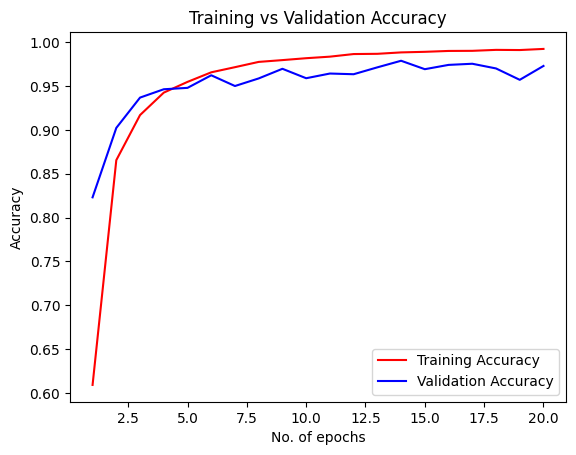

In [34]:
# Generate the epochs list based on the length of the accuracy history
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

PRECISION RECALL MATRIX

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_prediction = model.predict(test_set)
y_prediction, y_prediction.shape

550/550 [==============================] - 12s 21ms/step


(array([[1.0000000e+00, 6.9444181e-16, 1.0679988e-18, ..., 1.0461074e-27,
         1.0055947e-26, 1.9045928e-22],
        [1.0000000e+00, 3.4288301e-16, 2.8835533e-18, ..., 1.7726408e-25,
         1.1635948e-26, 2.8016389e-23],
        [1.0000000e+00, 4.4473528e-16, 1.4594029e-18, ..., 2.8375854e-30,
         3.6115457e-26, 9.5237513e-21],
        ...,
        [2.9660801e-13, 7.0375161e-16, 4.0935498e-11, ..., 1.4987368e-12,
         8.3762566e-14, 1.0000000e+00],
        [1.7078901e-16, 1.6925810e-19, 1.0446180e-12, ..., 1.4712141e-14,
         1.3277849e-15, 1.0000000e+00],
        [7.6622352e-24, 1.5079320e-24, 4.2190858e-20, ..., 1.0749082e-22,
         2.6514194e-20, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
prediction_category = tf.argmax(y_prediction, axis=1)

In [39]:
prediction_category

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_category = tf.concat([y for x, y in test_set], axis=0)
true_category

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
y_true = tf.argmax(true_category, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

Applying precision formula

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_true, prediction_category, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.99      0.98       504
                                 Apple___Black_rot       1.00      0.97      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.97      0.99      0.98       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.95      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, prediction_category)
cm

array([[497,   0,   0, ...,   0,   0,   0],
       [  2, 483,   4, ...,   0,   0,   0],
       [  0,   0, 433, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 479]], dtype=int64)

Confusion Matrix Visualization

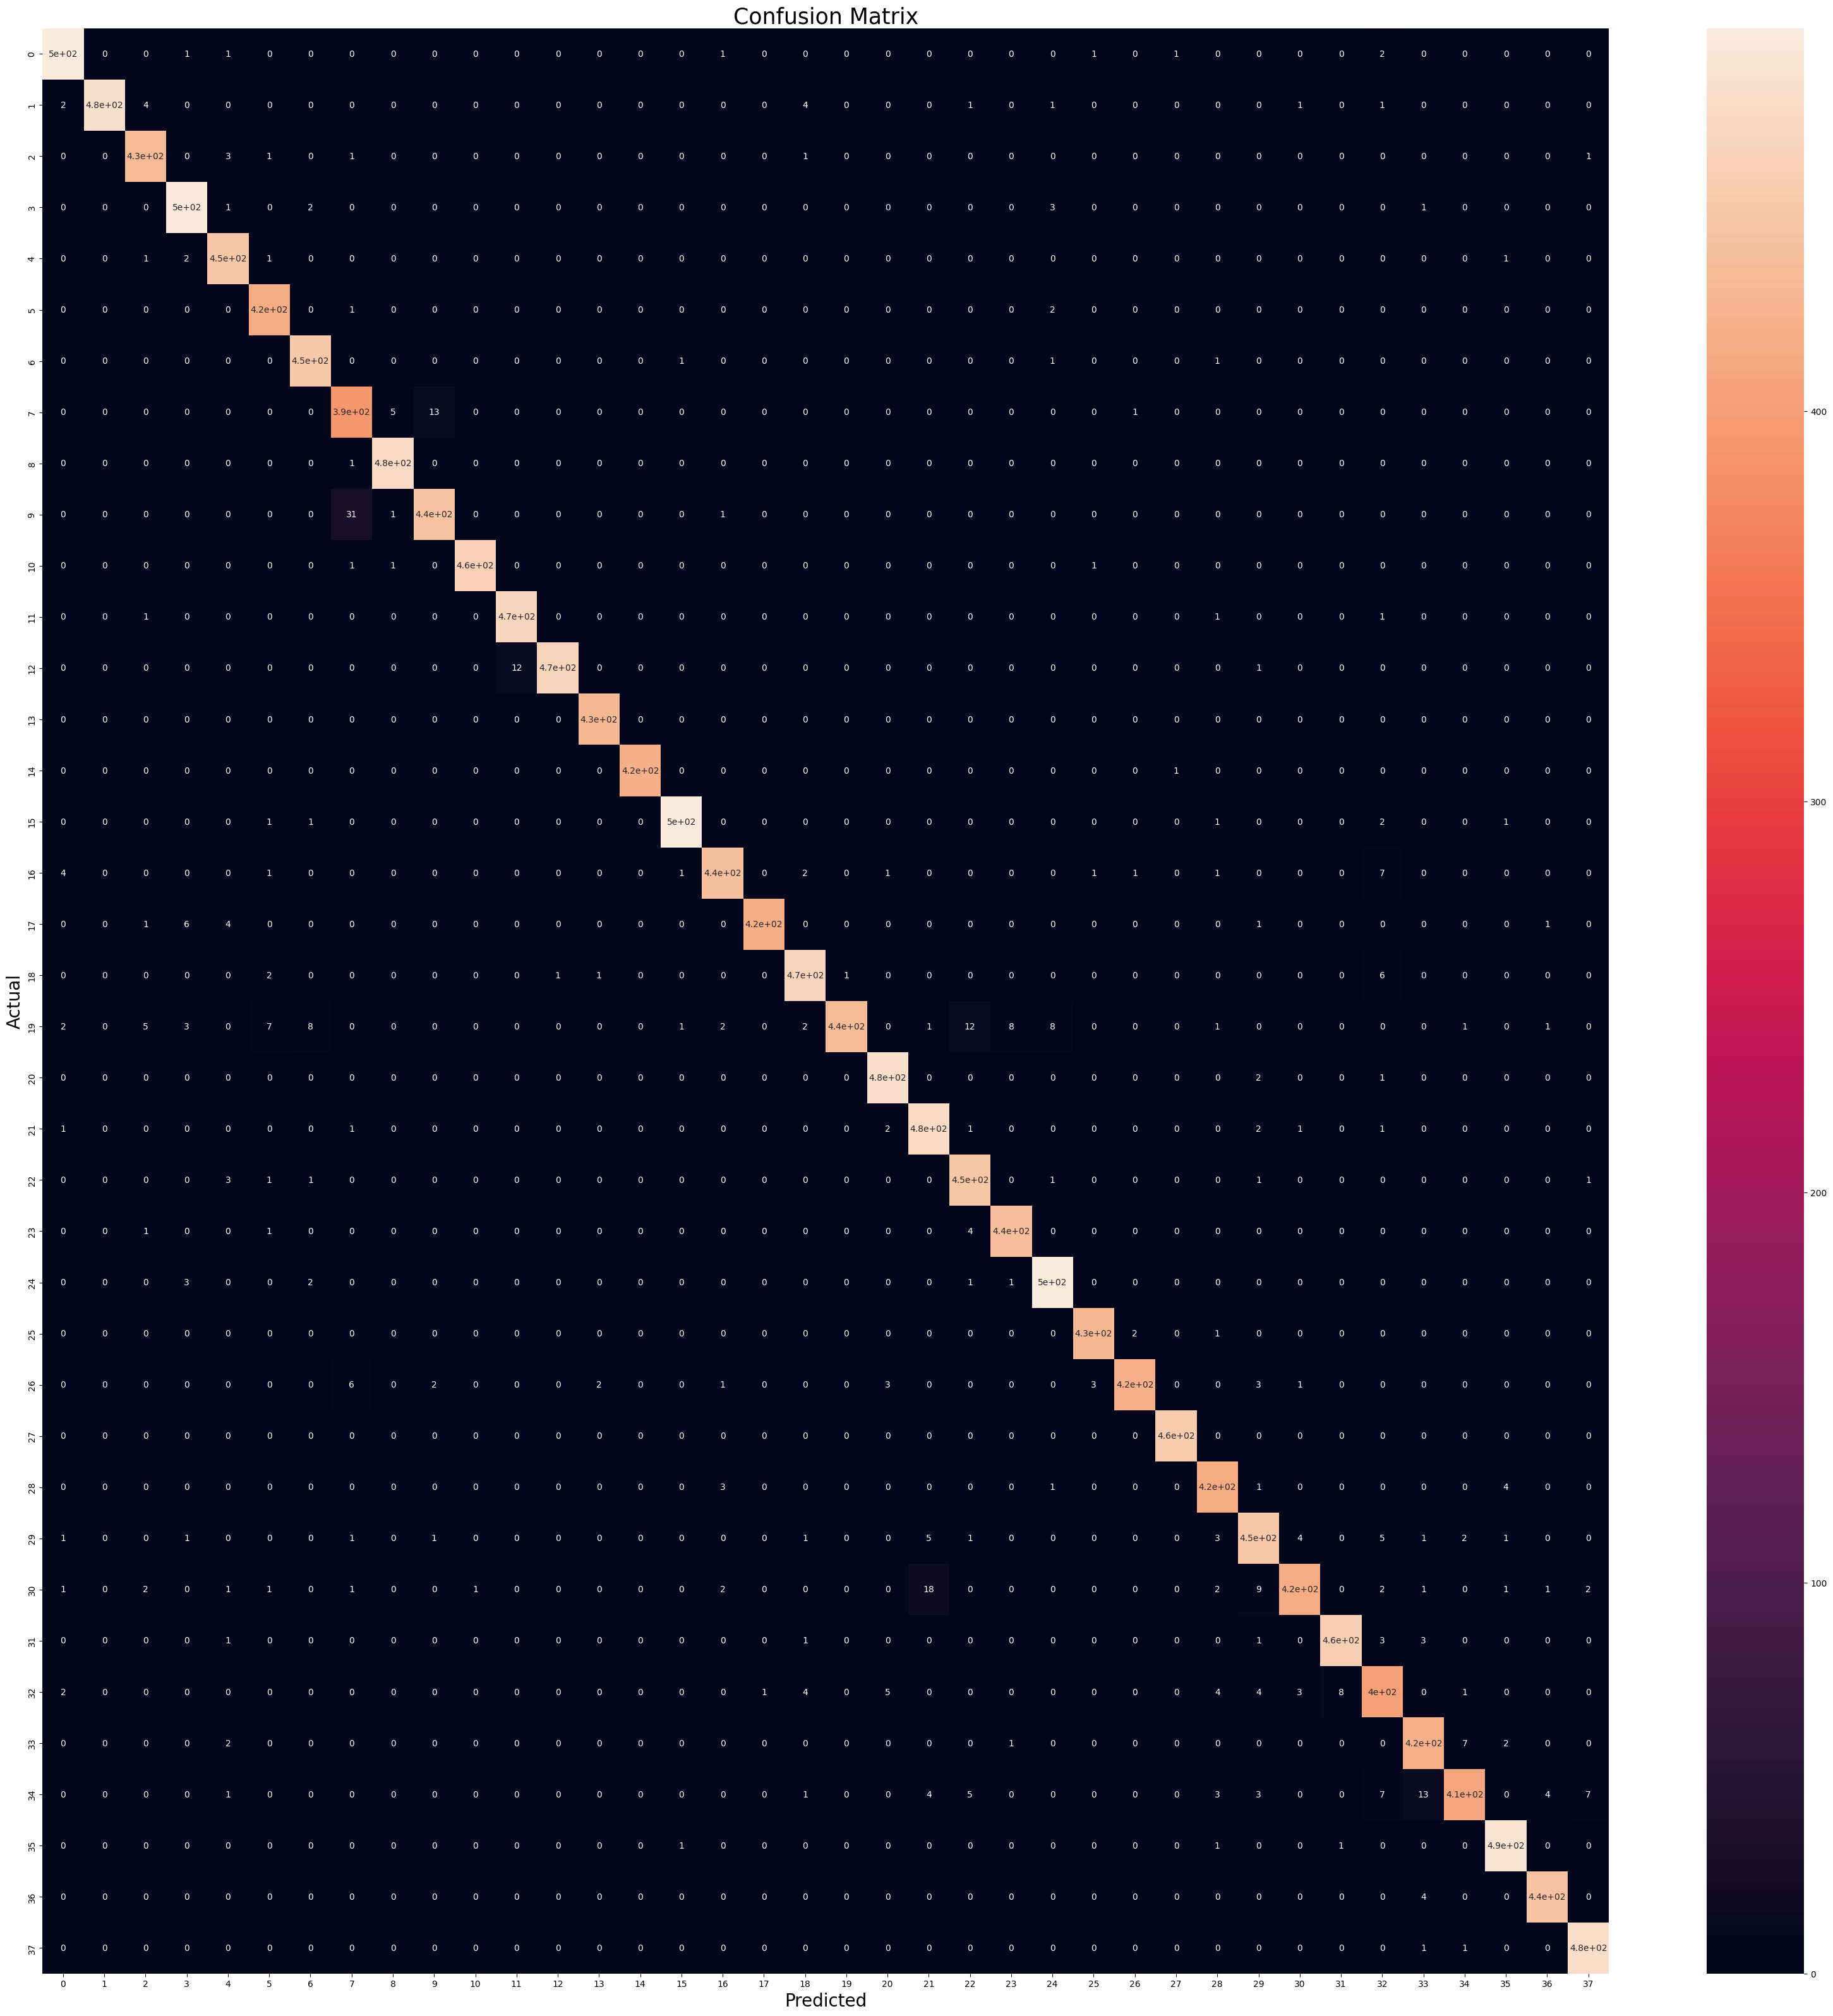

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()